In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем данные
df = pd.read_csv("result.csv")
df

,рид1,рид2,направление,длина_перекрытия,процент_несовпадений_нуклеотидов,количество_ошибок,индекс_в_референсе_рид1,индекс_в_референсе_рид2,истинность_перекрытия
0,SRR31296419.17,SRR31296419.4419,1,46,0.0,0,4725517,4725567,1
1,SRR31296419.23,SRR31296419.8520,0,70,0.0,0,3213326,3213352,1
2,SRR31296419.28,SRR31296419.8281,1,81,0.0,0,4319920,4319935,1
3,SRR31296419.41,SRR31296419.4332,1,77,0.0,0,3674995,3675016,1
4,SRR31296419.44,SRR31296419.879,0,53,0.0,0,3109701,3109701,1
...,...,...,...,...,...,...,...,...,...
11384,SRR31296419.12133,SRR31296419.5,0,10,50.0,5,199024,1979667,0
11385,SRR31296419.12134,SRR31296419.18,0,10,50.0,5,4123427,4598339,0
11386,SRR31296419.12136,SRR31296419.5,0,10,50.0,5,2616333,1979667,0
11387,SRR31296419.12137,SRR31296419.37,0,10,50.0,5,2583965,1793903,0


In [ ]:
df.drop(columns=["рид1", "рид2", "направление", "индекс_в_референсе_рид1", "индекс_в_референсе_рид2"], inplace=True)
df

,длина_перекрытия,процент_несовпадений_нуклеотидов,количество_ошибок,истинность_перекрытия
0,46,0.0,0,1
1,70,0.0,0,1
2,81,0.0,0,1
3,77,0.0,0,1
4,53,0.0,0,1
...,...,...,...,...
11384,10,50.0,5,0
11385,10,50.0,5,0
11386,10,50.0,5,0
11387,10,50.0,5,0


In [ ]:
df = df.sample(frac=1)
df

,длина_перекрытия,процент_несовпадений_нуклеотидов,количество_ошибок,истинность_перекрытия
8601,10,50.0,5,0
6329,10,50.0,5,0
832,52,0.0,0,1
5722,10,50.0,5,0
7544,10,40.0,4,0
...,...,...,...,...
6492,10,50.0,5,0
5686,10,40.0,4,0
367,80,0.0,0,1
2446,10,50.0,5,0


In [ ]:
# Разделяем данные на признаки и целевую переменную
X = df.drop(columns=["истинность_перекрытия"])
y = df["истинность_перекрытия"]

# Разделяем на тренировочные и валидационные данные
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Обучение логистической регрессии
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      5029
           1       0.98      1.00      0.99      1350

    accuracy                           1.00      6379
   macro avg       0.99      1.00      0.99      6379
weighted avg       1.00      1.00      1.00      6379



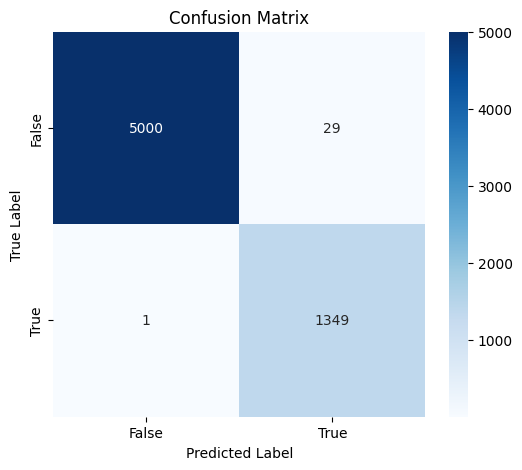

In [ ]:
# Загружаем тестовые данные
df_test = pd.read_csv("result_2.csv")

df_test.drop(columns=["рид1", "рид2", "направление", "индекс_в_референсе_рид1", "индекс_в_референсе_рид2"], inplace=True)
df_test = df_test.sample(frac=1)

# Разделяем на признаки и целевую переменную
X_test = df_test.drop(columns=["истинность_перекрытия"])
y_test = df_test["истинность_перекрытия"]

# Нормализация тестовых данных
X_test_scaled = scaler.transform(X_test)

# Предсказание на тестовых данных
y_pred = model.predict(X_test_scaled)

# Оценка качества модели
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Выводим отчет классификации
print("Classification Report:\n", report)

# Визуализируем матрицу ошибок
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
df_test

,длина_перекрытия,процент_несовпадений_нуклеотидов,количество_ошибок,истинность_перекрытия
535,66.0,0.0,0.0,1.0
5993,10.0,50.0,5.0,0.0
4061,10.0,50.0,5.0,0.0
2309,10.0,50.0,5.0,0.0
669,72.0,0.0,0.0,1.0
...,...,...,...,...
2574,10.0,30.0,3.0,0.0
4466,10.0,50.0,5.0,0.0
5408,10.0,50.0,5.0,0.0
5248,10.0,30.0,3.0,0.0


In [ ]:
X_test_scaled

array([[ 2.1267104 , -2.55478092, -2.63986149],
       [-0.35953989,  0.53510307,  0.53445262],
       [-0.35953989,  0.53510307,  0.53445262],
       ...,
       [-0.35953989,  0.53510307,  0.53445262],
       [-0.35953989, -0.70085053, -0.73527302],
       [-0.35953989,  0.53510307,  0.53445262]])

In [ ]:
print(X_train.isna().sum())
print(X_test.isna().sum())

длина_перекрытия                    0
процент_несовпадений_нуклеотидов    0
количество_ошибок                   0
dtype: int64
длина_перекрытия                    1
процент_несовпадений_нуклеотидов    1
количество_ошибок                   1
dtype: int64


In [ ]:
import joblib

# Сохранение модели
joblib.dump(model, "classifier.pkl")

# Сохранение нормализатора (если понадобится для тестирования на новых данных)
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']